## Testing serialization

Test UFlorida ACset representation and serialization

See https://algebraicjulia.github.io/Catlab.jl/stable/generated/categorical_algebra/acset_serialization/

In [1]:
using AlgebraicPetri
using AlgebraicPetri.ModelComparison
using Catlab
using Catlab.CategoricalAlgebra
using Catlab.Programs
using Catlab.WiringDiagrams
using Catlab.Graphics.Graphviz
using Catlab.Graphics.Graphviz: Html
using Plots
using JSON
using LabelledArrays
using PrettyTables

using GraphViz

### Define a 3-nodes graph

In [ ]:
@present SchDDS(FreeSchema) begin
  X::Ob
  Y::Ob
  Z::Ob
  next::Hom(Z,X)
  next2::Hom(X,Y)
end

JSON.print(generate_json_acset_schema(SchDDS), 2)

{
  "version": {
    "ACSetSchema": "0.0.1",
    "Catlab": "0.14.4"
  },
  "Ob": [
    {
      "name": "X"
    },
    {
      "name": "Y"
    },
    {
      "name": "Z"
    }
  ],
  "Hom": [
    {
      "name": "next",
      "codom": "X",
      "dom": "Z"
    },
    {
      "name": "next2",
      "codom": "Y",
      "dom": "X"
    }
  ],
  "AttrType": [],
  "Attr": []
}


### Sanity check

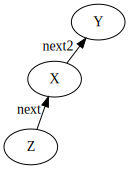

In [3]:
using Catlab.Theories, Catlab.WiringDiagrams, Catlab.Graphics
to_graphviz(SchDDS)

In [6]:
typeof(SchDDS)

Presentation{ThSchema, Symbol}

## Test on LabelledReactionNetwork

In [8]:
# Infectious type definition
infectious_type = LabelledPetriNet([:Pop],
  :interact=>((:Pop, :Pop)=>(:Pop, :Pop)), 
  :t_disease=>(:Pop=>:Pop),
  :t_strata=>(:Pop=>:Pop)
)

# Tease out the typed parts
s, = parts(infectious_type, :S)
t_interact, t_disease, t_strata = parts(infectious_type, :T)
i_interact1, i_interact2, i_disease, i_strata = parts(infectious_type, :I)
o_interact1, o_interact2, o_disease, o_strata = parts(infectious_type, :O);

infectious_type = map(infectious_type, Name=name->nothing); # remove names to allow for the loose ACSet transform to be natural

# Base SIR
SIR = LabelledPetriNet([:S, :I, :R],
  :inf => ((:S, :I)=>(:I, :I)),
  :rec => (:I=>:R),
  :id => (:S => :S),
  :id => (:I => :I),
  :id => (:R => :R)
)

# Typed SIR
typed_SIR = ACSetTransformation(SIR, infectious_type,
  S = [s, s, s],
  T = [t_interact, t_disease, t_strata, t_strata, t_strata],
  I = [i_interact1, i_interact2, i_disease, i_strata, i_strata, i_strata],
  O = [o_interact1, o_interact2, o_disease, o_strata, o_strata, o_strata],
  Name = name -> nothing # specify the mapping for the loose ACSet transform
);

In [12]:
println(typeof(SIR))
println(typeof(typed_SIR))

LabelledPetriNet
LooseACSetTransformation{Catlab.Theories.SchemaDescType{(:T, :S, :I, :O), (:it, :is, :ot, :os), (:Name,), (:tname, :sname), (it = 3, is = 3, ot = 4, os = 4, tname = 1, sname = 2), (it = 1, is = 2, ot = 1, os = 2, tname = 1, sname = 1)}, NamedTuple{(:T, :S, :I, :O), NTuple{4, Catlab.CategoricalAlgebra.FinSets.FinDomFunctionVector{Int64, Vector{Int64}, Catlab.CategoricalAlgebra.FinSets.FinSetInt}}}, NamedTuple{(:Name,), Tuple{Catlab.CategoricalAlgebra.Sets.SetFunctionCallable{Symbol, Nothing, TypeSet{Symbol}, TypeSet{Nothing}}}}, LabelledPetriNet, AlgebraicPetri.LabelledPetriNetUntyped{Nothing}}


### SIR 

In [39]:
JSON.print(generate_json_acset(SIR), 2)

{
  "T": [
    {
      "tname": "inf"
    },
    {
      "tname": "rec"
    },
    {
      "tname": "id"
    },
    {
      "tname": "id"
    },
    {
      "tname": "id"
    }
  ],
  "S": [
    {
      "sname": "S"
    },
    {
      "sname": "I"
    },
    {
      "sname": "R"
    }
  ],
  "I": [
    {
      "it": 1,
      "is": 1
    },
    {
      "it": 1,
      "is": 2
    },
    {
      "it": 2,
      "is": 2
    },
    {
      "it": 3,
      "is": 1
    },
    {
      "it": 4,
      "is": 2
    },
    {
      "it": 5,
      "is": 3
    }
  ],
  "O": [
    {
      "ot": 1,
      "os": 2
    },
    {
      "ot": 1,
      "os": 2
    },
    {
      "ot": 2,
      "os": 3
    },
    {
      "ot": 3,
      "os": 1
    },
    {
      "ot": 4,
      "os": 2
    },
    {
      "ot": 5,
      "os": 3
    }
  ]
}


In [41]:
JSON.print(generate_json_acset(typed_SIR.dom), 2)

{
  "T": [
    {
      "tname": "inf"
    },
    {
      "tname": "rec"
    },
    {
      "tname": "id"
    },
    {
      "tname": "id"
    },
    {
      "tname": "id"
    }
  ],
  "S": [
    {
      "sname": "S"
    },
    {
      "sname": "I"
    },
    {
      "sname": "R"
    }
  ],
  "I": [
    {
      "it": 1,
      "is": 1
    },
    {
      "it": 1,
      "is": 2
    },
    {
      "it": 2,
      "is": 2
    },
    {
      "it": 3,
      "is": 1
    },
    {
      "it": 4,
      "is": 2
    },
    {
      "it": 5,
      "is": 3
    }
  ],
  "O": [
    {
      "ot": 1,
      "os": 2
    },
    {
      "ot": 1,
      "os": 2
    },
    {
      "ot": 2,
      "os": 3
    },
    {
      "ot": 3,
      "os": 1
    },
    {
      "ot": 4,
      "os": 2
    },
    {
      "ot": 5,
      "os": 3
    }
  ]
}


In [77]:
g = @acset Catlab.Graphs.Graph begin
  V = 4
  E = 2
  src=[1,2]
  tgt = [2,3]
end

out = generate_json_acset(g)

OrderedCollections.OrderedDict{Symbol, Vector} with 2 entries:
  :V => [NamedTuple(), NamedTuple(), NamedTuple(), NamedTuple()]
  :E => NamedTuple{(:src, :tgt), Tuple{Int64, Int64}}[(src = 1, tgt = 2), (src …

In [81]:
@present SchDDS(FreeSchema) begin
  X::Ob
  next::Hom(X,X)
end

@present SchLabeledDDS <: SchDDS begin
  Label::AttrType
  label::Attr(X, Label)
end

@acset_type LabeledDDS(SchLabeledDDS, index=[:next, :label])

ldds = LabeledDDS{Int}()
add_parts!(ldds, :X, 4, next=[2,3,4,1], label=[100, 101, 102, 103])
JSON.print(generate_json_acset(ldds),2)

{
  "X": [
    {
      "next": 2,
      "label": 100
    },
    {
      "next": 3,
      "label": 101
    },
    {
      "next": 4,
      "label": 102
    },
    {
      "next": 1,
      "label": 103
    }
  ]
}


In [171]:
lala = generate_json_acset(ldds)
JSON.print(lala)

{"X":[{"next":2,"label":100},{"next":3,"label":101},{"next":4,"label":102},{"next":1,"label":103}]}

In [174]:
lala.keys

1-element Vector{Symbol}:
 :X

In [169]:
function ttt(::Type{T}, input::AbstractDict) where T <: ACSet
  println("start debugging")
  out = T()
  println("foo")
  for (k,v) ∈ input
    println("<< ", Symbol(k), " ", v)
    add_parts!(out, Symbol(k), length(v))
  end
    
  println("hello world")
  for l ∈ values(input)
    println("> ", l)
    for (i, j) ∈ enumerate(l)
      println("==> ", typeof(i))
      println("==> ", typeof(j))
      println("==> ", j)

      for (k,v) ∈ j
        println("====> ", k, v)
        vtype = eltype(out[Symbol(k)])
        if !(v isa vtype)
          v = vtype(v)
        end
        set_subpart!(out, i, Symbol(k), v)
      end
    end
  end
  out
end

ttt (generic function with 1 method)

In [187]:
ttt(LabelledPetriNet, generate_json_acset(SIR))

start debugging
foo
<< T NamedTuple{(:tname,), Tuple{Symbol}}[(tname = :inf,), (tname = :rec,), (tname = :id,), (tname = :id,), (tname = :id,)]
<< S NamedTuple{(:sname,), Tuple{Symbol}}[(sname = :S,), (sname = :I,), (sname = :R,)]
<< I NamedTuple{(:it, :is), Tuple{Int64, Int64}}[(it = 1, is = 1), (it = 1, is = 2), (it = 2, is = 2), (it = 3, is = 1), (it = 4, is = 2), (it = 5, is = 3)]
<< O NamedTuple{(:ot, :os), Tuple{Int64, Int64}}[(ot = 1, os = 2), (ot = 1, os = 2), (ot = 2, os = 3), (ot = 3, os = 1), (ot = 4, os = 2), (ot = 5, os = 3)]
hello world
> NamedTuple{(:tname,), Tuple{Symbol}}[(tname = :inf,), (tname = :rec,), (tname = :id,), (tname = :id,), (tname = :id,)]
==> Int64
==> NamedTuple{(:tname,), Tuple{Symbol}}
==> (tname = :inf,)


LoadError: MethodError: no method matching iterate(::Symbol)
[0mClosest candidates are:
[0m  iterate([91m::Union{LinRange, StepRangeLen}[39m) at /opt/julia-1.7.3/share/julia/base/range.jl:826
[0m  iterate([91m::Union{LinRange, StepRangeLen}[39m, [91m::Integer[39m) at /opt/julia-1.7.3/share/julia/base/range.jl:826
[0m  iterate([91m::T[39m) where T<:Union{Base.KeySet{<:Any, <:Dict}, Base.ValueIterator{<:Dict}} at /opt/julia-1.7.3/share/julia/base/dict.jl:695
[0m  ...

In [130]:
typeof(ldds)

LabeledDDS{Int64}

In [178]:
LabeledDDS.var

Label